# Analyse twitter data

## Import packages

In [1]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import numpy as np

## Read data

In [2]:
file_name = '1311350546905866240.pickle'

In [3]:
file_path = '../data/processed/' + file_name

In [4]:
df = pd.read_pickle(file_path)

## Drop unncessary columns

In [5]:
df.drop(['id', 'user_id', 'user_name', 'user_description'], axis=1, inplace=True)

## Explore

In [6]:
df.head(5)

,index,created_at,full_text,user_screen_name,user_location,user_followers_count,retweet_count,favorite_count,lang,processed_text,stemmed,sentiment_score_stemmed,sentiment_score,sent_class,sent_class_stemmed
0,0,2020-10-01 04:50:28,Can’t wait 😊,Aliceox7,NaN,0,0,0,en,[wait],[wait],0.0000,0.0000,neutral,neutral
1,1,2020-10-01 04:46:56,Come to Xbox already,ZackFulmer,NaN,9,0,0,en,"[come, xbox, already]","[come, xbox, alreadi]",0.0000,0.0000,neutral,neutral
2,2,2020-10-01 04:42:56,Not a huge fan of this. Cool for many but cost...,Ty_Hope,"Saitama, Japan 埼玉、東大宮",1127,0,0,en,"[huge, fan, cool, many, costumes, definitely, ...","[huge, fan, cool, mani, costum, definit, feel,...",1.3565,1.7584,strongly positive,strongly positive
3,3,2020-10-01 04:39:08,Your games dead,AustinAsbridge,NaN,13,0,0,en,"[games, dead]","[game, dead]",-0.6486,-0.6486,negative,negative
4,4,2020-10-01 04:25:34,Why are there comments saying the game is dead...,FNGoodBoi,Salty Springs,8,0,0,en,"[comments, saying, game, dead, better, war, zo...","[comment, say, game, dead, better, war, zone, ...",-1.5450,-1.5450,strongly negative,strongly negative


In [7]:
df.shape

(289, 15)

### Language distribution

In [8]:
df['lang'].value_counts()

en     263
und     19
es       2
pt       2
fr       1
in       1
sv       1
Name: lang, dtype: int64

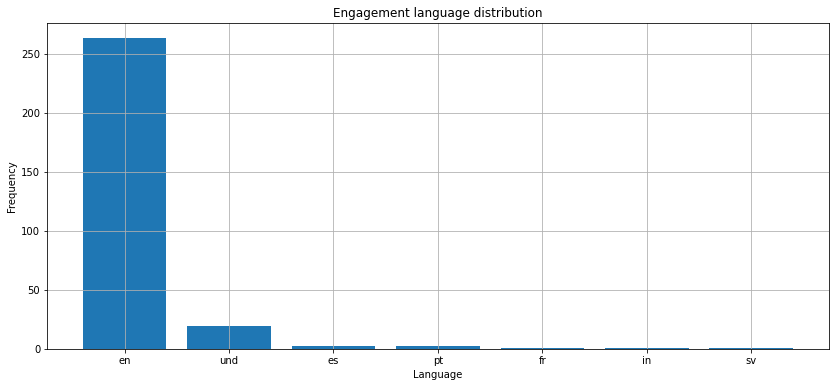

In [9]:
fig, ax = plt.subplots(figsize=(14,6))
ax.bar(df['lang'].value_counts().index, df['lang'].value_counts())
ax.set(
    title='Engagement language distribution',
    ylabel='Frequency',
    xlabel='Language'
)
ax.grid()
plt.show()

Language codes are difficult to understand to those that are unfamiliar.
We will change these to their full names.

In [10]:
import requests
import lxml.html as lh

In [11]:
# Scrape from the language code table at the url below
language_code_url = 'https://www.sitepoint.com/iso-2-letter-language-codes/'
r = requests.get(language_code_url)
doc = lh.fromstring(r.content)
# tr elements hold table rows. We can locate them via the xpath.
tr_elements = doc.xpath('//tr')
# Create a list of all the text content for each table row element.
content = [t.text_content() for t in tr_elements]
# Column names are found at content[0], only interested in content (starting at element 1)
# Remove the '\n' padding on the left and right of the string
# Split the string on the '\n' delimiter
parsed_content = [c.lstrip('\n').rstrip('\n').split('\n') for c in content[1:]]
# Unpack the parsed content
k, v = zip(*parsed_content)
# Lower case the code string to match the code in our twitter data.
v = [val.lower() for val in v]
language_dict = {val:key for key, val in zip(k,v)}

In [12]:
language_dict

{'ab': 'Abkhazian',
 'aa': 'Afar',
 'af': 'Afrikaans',
 'sq': 'Albanian',
 'am': 'Amharic',
 'ar': 'Arabic',
 'hy': 'Armenian',
 'as': 'Assamese',
 'ay': 'Aymara',
 'az': 'Azerbaijani',
 'ba': 'Bashkir',
 'eu': 'Basque',
 'bn': 'Bengali, Bangla',
 'dz': 'Bhutani',
 'bh': 'Bihari',
 'bi': 'Bislama',
 'br': 'Breton',
 'bg': 'Bulgarian',
 'my': 'Burmese',
 'be': 'Byelorussian',
 'km': 'Cambodian',
 'ca': 'Catalan',
 'zh': 'Chinese',
 'co': 'Corsican',
 'hr': 'Croatian',
 'cs': 'Czech',
 'da': 'Danish',
 'nl': 'Dutch',
 'en': 'English, American',
 'eo': 'Esperanto',
 'et': 'Estonian',
 'fo': 'Faeroese',
 'fj': 'Fiji',
 'fi': 'Finnish',
 'fr': 'French',
 'fy': 'Frisian',
 'gd': 'Gaelic (Scots Gaelic)',
 'gl': 'Galician',
 'ka': 'Georgian',
 'de': 'German',
 'el': 'Greek',
 'kl': 'Greenlandic',
 'gn': 'Guarani',
 'gu': 'Gujarati',
 'ha': 'Hausa',
 'iw': 'Hebrew',
 'hi': 'Hindi',
 'hu': 'Hungarian',
 'is': 'Icelandic',
 'in': 'Indonesian',
 'ia': 'Interlingua',
 'ie': 'Interlingue',
 'ik': 'I

In [13]:
language_dict['und'] = 'Undetermined'

In [14]:
df['lang'] = df['lang'].replace(language_dict, regex=True)
df['lang']

0      English, American
1      English, American
2      English, American
3      English, American
4      English, American
             ...        
284    English, American
285    English, American
286    English, American
287    English, American
288    English, American
Name: lang, Length: 289, dtype: object

In [15]:
df['lang'].value_counts()

English, American    263
Undetermined          19
Spanish                2
Portuguese             2
Swedish                1
French                 1
Indonesian             1
Name: lang, dtype: int64

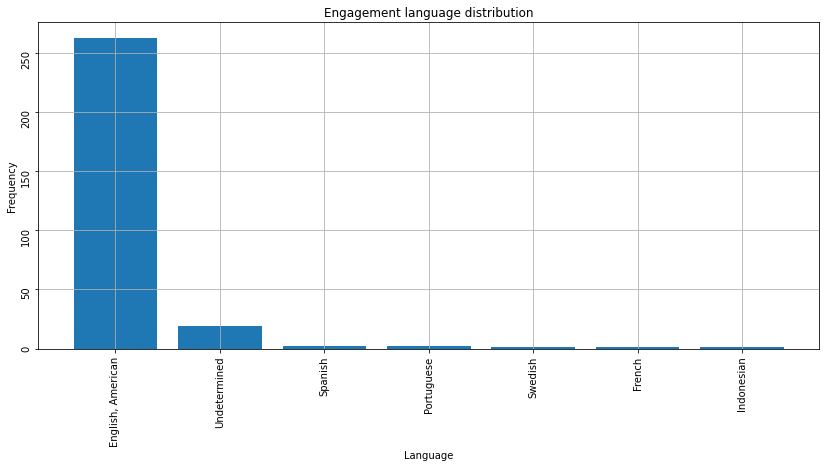

In [16]:
fig, ax = plt.subplots(figsize=(14,6))
ax.bar(df['lang'].value_counts().index, df['lang'].value_counts())
ax.set(
    title='Engagement language distribution',
    ylabel='Frequency',
    xlabel='Language'
)
ax.tick_params(rotation=90)
ax.grid()
plt.show()

### Filter the data for ENGLISH tweets only.

In [17]:
df_en = df[df['lang'].str.contains('En')].copy()

In [18]:
df_en.reset_index(inplace=True, drop = True)

In [19]:
df_en.head(5)

,index,created_at,full_text,user_screen_name,user_location,user_followers_count,retweet_count,favorite_count,lang,processed_text,stemmed,sentiment_score_stemmed,sentiment_score,sent_class,sent_class_stemmed
0,0,2020-10-01 04:50:28,Can’t wait 😊,Aliceox7,NaN,0,0,0,"English, American",[wait],[wait],0.0000,0.0000,neutral,neutral
1,1,2020-10-01 04:46:56,Come to Xbox already,ZackFulmer,NaN,9,0,0,"English, American","[come, xbox, already]","[come, xbox, alreadi]",0.0000,0.0000,neutral,neutral
2,2,2020-10-01 04:42:56,Not a huge fan of this. Cool for many but cost...,Ty_Hope,"Saitama, Japan 埼玉、東大宮",1127,0,0,"English, American","[huge, fan, cool, many, costumes, definitely, ...","[huge, fan, cool, mani, costum, definit, feel,...",1.3565,1.7584,strongly positive,strongly positive
3,3,2020-10-01 04:39:08,Your games dead,AustinAsbridge,NaN,13,0,0,"English, American","[games, dead]","[game, dead]",-0.6486,-0.6486,negative,negative
4,4,2020-10-01 04:25:34,Why are there comments saying the game is dead...,FNGoodBoi,Salty Springs,8,0,0,"English, American","[comments, saying, game, dead, better, war, zo...","[comment, say, game, dead, better, war, zone, ...",-1.5450,-1.5450,strongly negative,strongly negative


In [20]:
df_en.shape

(263, 15)

#### Sentiment distribution

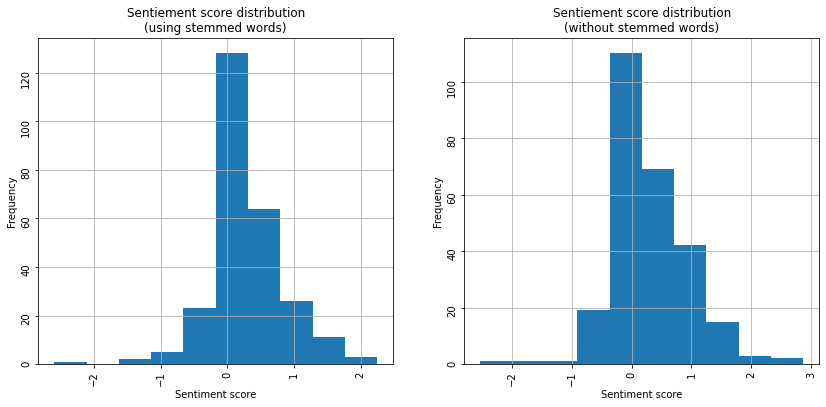

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(14,6))
ax[0].hist(df_en['sentiment_score_stemmed'])
ax[0].set(
    title='Sentiement score distribution\n(using stemmed words)',
    ylabel='Frequency',
    xlabel='Sentiment score'
)
ax[0].grid()
ax[0].tick_params(rotation=90)
#ax[0].yaxis.set(ticks=range(0,1000,100))
ax[1].hist(df_en['sentiment_score'])
ax[1].set(
    title='Sentiement score distribution\n(without stemmed words)',
    ylabel='Frequency',
    xlabel='Sentiment score'
)
ax[1].grid()
ax[1].tick_params(rotation=90)
#ax[1].yaxis.set(ticks=range(0,1000,100))
plt.show()

#### Sentiment class count

In [22]:
df_en['sent_class_stemmed'].value_counts()

positive             107
neutral              104
negative              33
strongly positive     16
strongly negative      3
Name: sent_class_stemmed, dtype: int64

In [23]:
df_en['sent_class'].value_counts()

positive             121
neutral               86
negative              31
strongly positive     22
strongly negative      3
Name: sent_class, dtype: int64

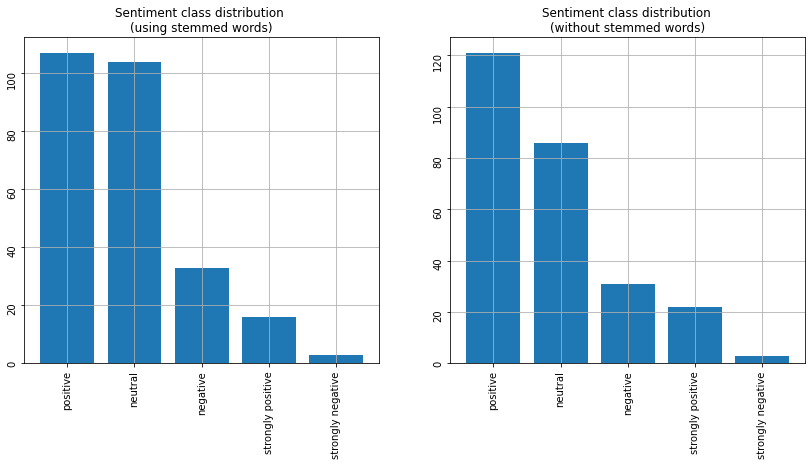

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(14,6))
ax[0].bar(df_en['sent_class_stemmed'].value_counts().index, df_en['sent_class_stemmed'].value_counts())
ax[0].set(title='Sentiment class distribution \n(using stemmed words)')
ax[0].grid()
ax[0].tick_params(rotation=90)
ax[1].bar(df_en['sent_class'].value_counts().index, df_en['sent_class'].value_counts())
ax[1].set(title='Sentiment class distribution \n(without stemmed words)')
ax[1].tick_params(rotation=90)
ax[1].grid()
plt.show()

**As neutral does not contribute much towards understanding the audience's feelings we can remove it**

In [25]:
df_not_neut = df.drop(df[((df['sent_class_stemmed']=='neutral') | (df['sent_class']=='neutral'))
                ].index, axis=0).reset_index(drop=True).copy()

In [26]:
df_not_neut['sent_class_stemmed'].value_counts()

positive             108
negative              31
strongly positive     16
strongly negative      3
neutral                0
Name: sent_class_stemmed, dtype: int64

In [27]:
df_not_neut['sent_class_stemmed'].cat.remove_unused_categories(inplace=True)
df_not_neut['sent_class'].cat.remove_unused_categories(inplace=True)

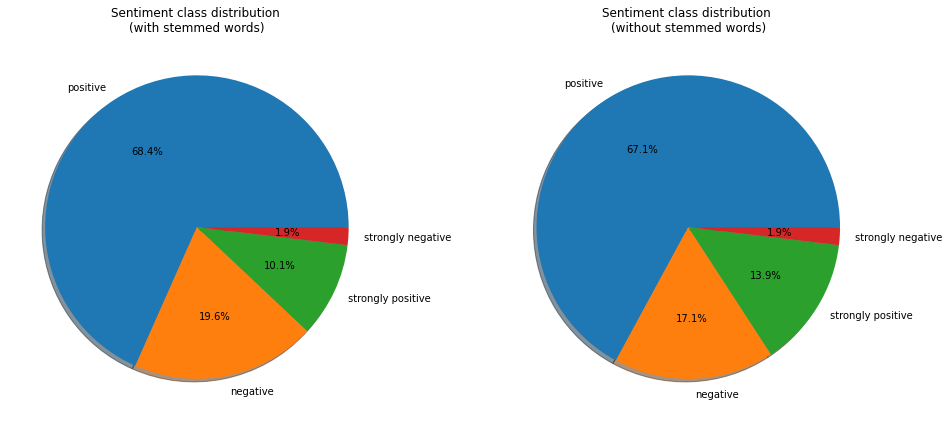

In [28]:
fig, ax = plt.subplots(1, 2, figsize=(14,6))
ax[0].pie(
    df_not_neut['sent_class_stemmed'].value_counts(),
    labels=df_not_neut['sent_class_stemmed'].value_counts().index,
    autopct='%1.1f%%',
    shadow=True
)
ax[0].set(title='Sentiment class distribution \n(with stemmed words)')
ax[1].pie(
    df_not_neut['sent_class'].value_counts(),
    labels=df_not_neut['sent_class'].value_counts().index,
    autopct='%1.1f%%',
    shadow=True
)
ax[1].set(title='Sentiment class distribution \n(without stemmed words)')
plt.grid(False)
plt.axis('on')
plt.tight_layout()
plt.show()

### Number of tweets in reply to over time. Group by hourly.

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   index                    289 non-null    int64         
 1   created_at               289 non-null    datetime64[ns]
 2   full_text                289 non-null    object        
 3   user_screen_name         289 non-null    object        
 4   user_location            154 non-null    object        
 5   user_followers_count     289 non-null    int64         
 6   retweet_count            289 non-null    int64         
 7   favorite_count           289 non-null    int64         
 8   lang                     289 non-null    object        
 9   processed_text           289 non-null    object        
 10  stemmed                  289 non-null    object        
 11  sentiment_score_stemmed  289 non-null    float64       
 12  sentiment_score          289 non-nul

**The above shows that created_at is an object**

We will change dtype to datetime64

In [30]:
df['created_at']

0     2020-10-01 04:50:28
1     2020-10-01 04:46:56
2     2020-10-01 04:42:56
3     2020-10-01 04:39:08
4     2020-10-01 04:25:34
              ...        
284   2020-09-30 17:20:06
285   2020-09-30 17:20:02
286   2020-09-30 17:19:39
287   2020-09-30 17:19:06
288   2020-09-30 17:19:03
Name: created_at, Length: 289, dtype: datetime64[ns]

In [31]:
frequencies = ['min', 'H']

In [32]:
engage_freq = [df.groupby([
    pd.Grouper(key='created_at', freq=f)])\
.size()\
.reset_index(name='count')\
.set_index('created_at') for f in frequencies]

engage_freq

[                     count
 created_at                
 2020-09-30 17:19:00      3
 2020-09-30 17:20:00      6
 2020-09-30 17:21:00      1
 2020-09-30 17:22:00      3
 2020-09-30 17:23:00      0
 ...                    ...
 2020-10-01 04:46:00      1
 2020-10-01 04:47:00      0
 2020-10-01 04:48:00      0
 2020-10-01 04:49:00      0
 2020-10-01 04:50:00      1
 
 [692 rows x 1 columns],
                      count
 created_at                
 2020-09-30 17:00:00     65
 2020-09-30 18:00:00     52
 2020-09-30 19:00:00     42
 2020-09-30 20:00:00     30
 2020-09-30 21:00:00     27
 2020-09-30 22:00:00     14
 2020-09-30 23:00:00     14
 2020-10-01 00:00:00     16
 2020-10-01 01:00:00      9
 2020-10-01 02:00:00      8
 2020-10-01 03:00:00      3
 2020-10-01 04:00:00      9]

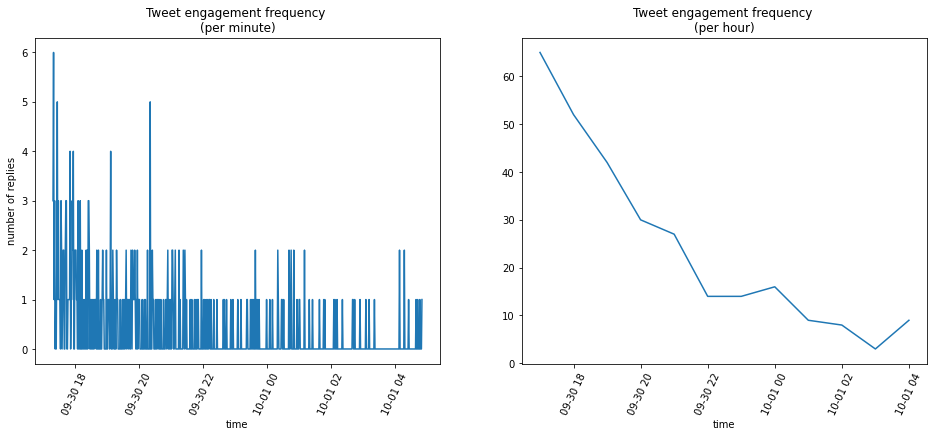

In [33]:
fig, ax = plt.subplots(1, 2, figsize=(16,6))
ax[0].plot(engage_freq[0])
ax[0].tick_params(axis='x', labelrotation=65)
ax[0].set(
    title='Tweet engagement frequency \n(per minute)',
    xlabel='time',
    ylabel='number of replies'
)
ax[1].plot(engage_freq[1])
ax[1].tick_params(axis='x', labelrotation=65)
ax[1].set(
    title='Tweet engagement frequency \n(per hour)',
    xlabel='time'
)
plt.show()

## Prevalance of words

### Top words

In [34]:
import re
words = df['processed_text'].dropna()\
.apply(lambda x: pd.value_counts(re.findall('([\s]\w+[\s])',' '.join(x))))\
.sum(axis=0)\
.to_frame()\
.reset_index()\
.sort_values(by=0, ascending=False)
words.columns = ['word', 'occurences']

In [35]:
words.reset_index(inplace=True, drop=True)
words.head(10)

,word,occurences
0,crowns,20.0
1,game,20.0
2,get,18.0
3,guys,18.0
4,win,17.0
5,season,16.0
6,fall,12.0
7,crown,8.0
8,one,7.0
9,2,7.0


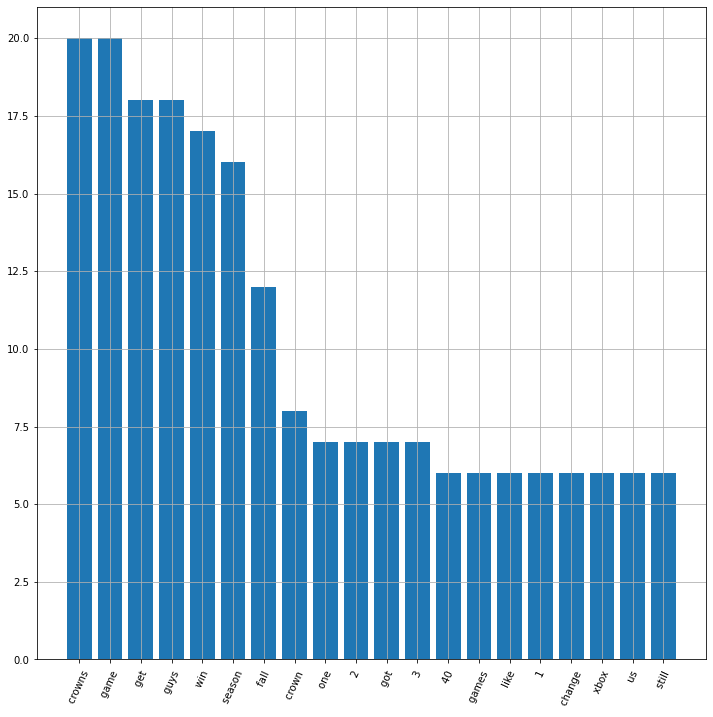

In [36]:
fig, ax = plt.subplots(figsize=(12,12))
ax.bar(words['word'].head(20), words['occurences'].head(20))
ax.tick_params(axis='x', labelrotation=65)
ax.grid()
plt.show()

### Word clouds

### View good sentiment wordcloud

In [37]:
from wordcloud import WordCloud, STOPWORDS
bigstring = df[df['sent_class_stemmed'].str.contains('positive')]['stemmed'].apply(lambda x: ' '.join(x)).str.cat(sep=' ')

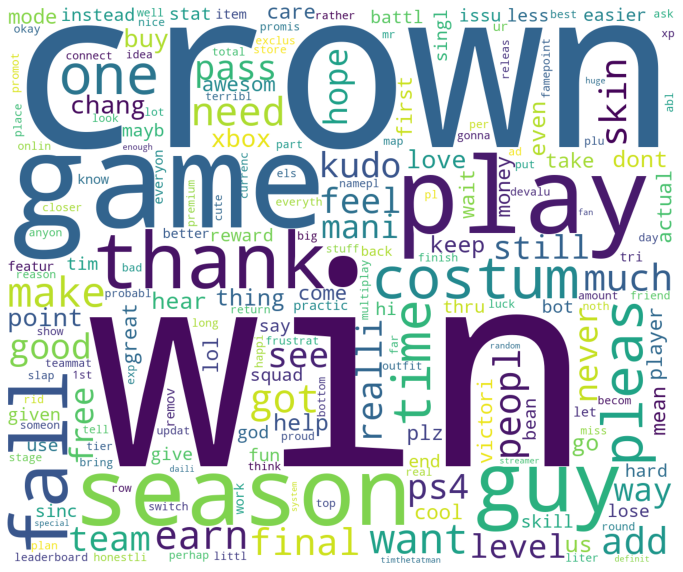

In [38]:
plt.figure(figsize=(12,12))
wordcloud = WordCloud(
    stopwords=STOPWORDS,
    background_color='white',
    collocations=False,
    width=1200,
    height=1000
).generate(bigstring)
plt.axis('off')
plt.imshow(wordcloud)

### View bad sentiment wordcloud

In [39]:
bigstring = df[df['sent_class_stemmed'].str.contains('negative')]['stemmed'].apply(lambda x: ' '.join(x)).str.cat(sep=' ')

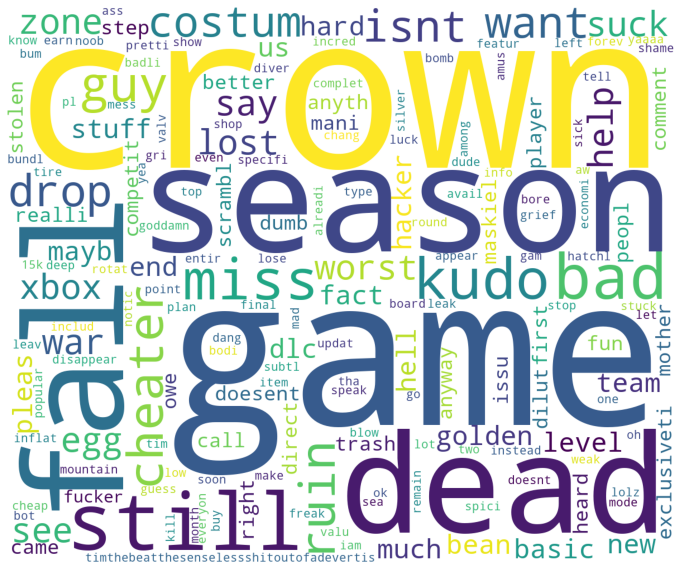

In [40]:
plt.figure(figsize=(12,12))
wordcloud = WordCloud(
    stopwords=STOPWORDS,
    background_color='white',
    collocations=False,
    width=1200,
    height=1000
).generate(bigstring)
plt.axis('off')
plt.imshow(wordcloud)